In [1]:
# импортирование основных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# отключение назойливых варнингов
import warnings
warnings.filterwarnings('ignore')

In [93]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

In [82]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [83]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [94]:
# перед объединением датафреймов установим метки
red['color'] = 'red'
white['color'] = 'white'

In [95]:
# объединение
df = pd.concat([red, white])
df.index = pd.RangeIndex(len(df))

In [86]:
# Выведем основные статискики
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [55]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Пропусков нет. Сразу у некоторых признаков наблюдаются выбросы или "длиные хвосты": residual sugar, total sulfur dioxide.

Посмотрим на распределения признаков и целевой переменной.

In [56]:
feature_columns = list(set(df.columns)-{'color'})

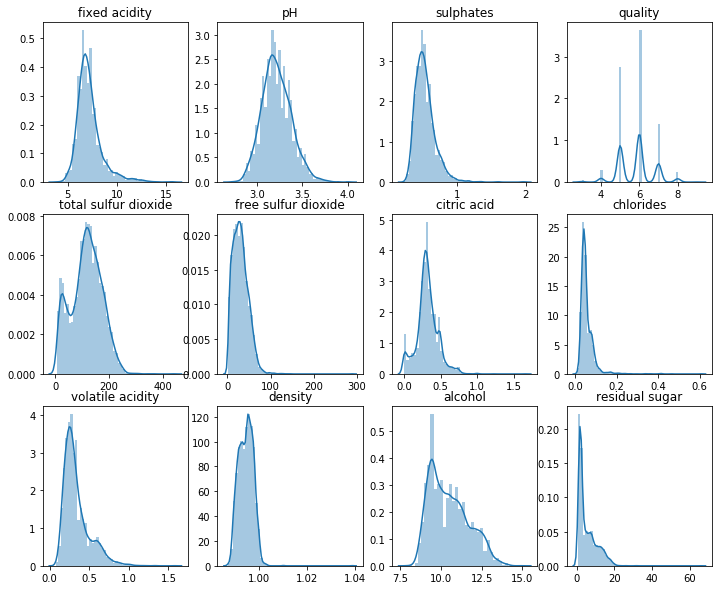

In [57]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(feature_columns, 1):
    axes = plt.subplot(3, 4, i)
    sns.distplot(df[col], ax=axes)
    axes.set_xlabel(None)
    axes.set_title(col)

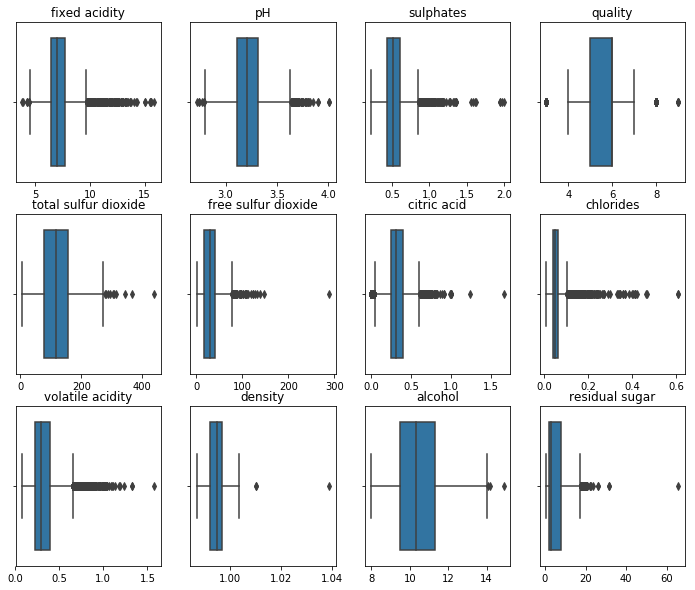

In [58]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(feature_columns, 1):
    axes = plt.subplot(3, 4, i)
    sns.boxplot(df[col], ax=axes)
    axes.set_xlabel(None)
    axes.set_title(col)

Распределение по цвету вина. Наблюдается небольшой дисбаланс(1:3).

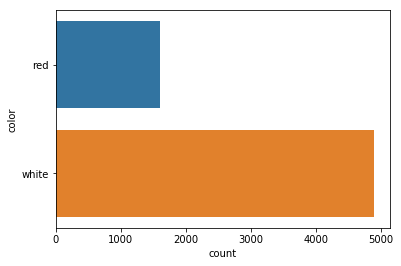

In [59]:
sns.countplot(y=df['color'])

Распределение переменной. Наблюдается большой дисбаланс классов. Придётся либо работать над аугментацией данных,
либо попробовать свести к задаче регрессии, т.к. распределение более или менее похоже на нормальное.

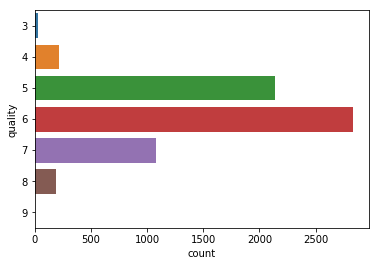

In [60]:
sns.countplot(y=df['quality'])

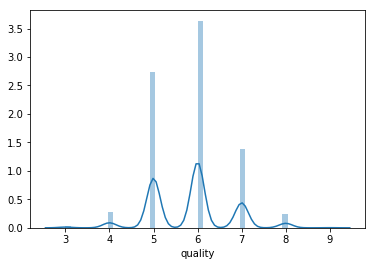

In [61]:
sns.distplot(df['quality'])

Построим pairplot для признаков и целевой переменной в зависимости от цвета вина. Иногда можно увидеть интересные вещи, например, распределение качества белого вина немного смещено в право от этого же распределения для красного(правый нижний рисунок). то есть качество белого вина обычно немного выше.

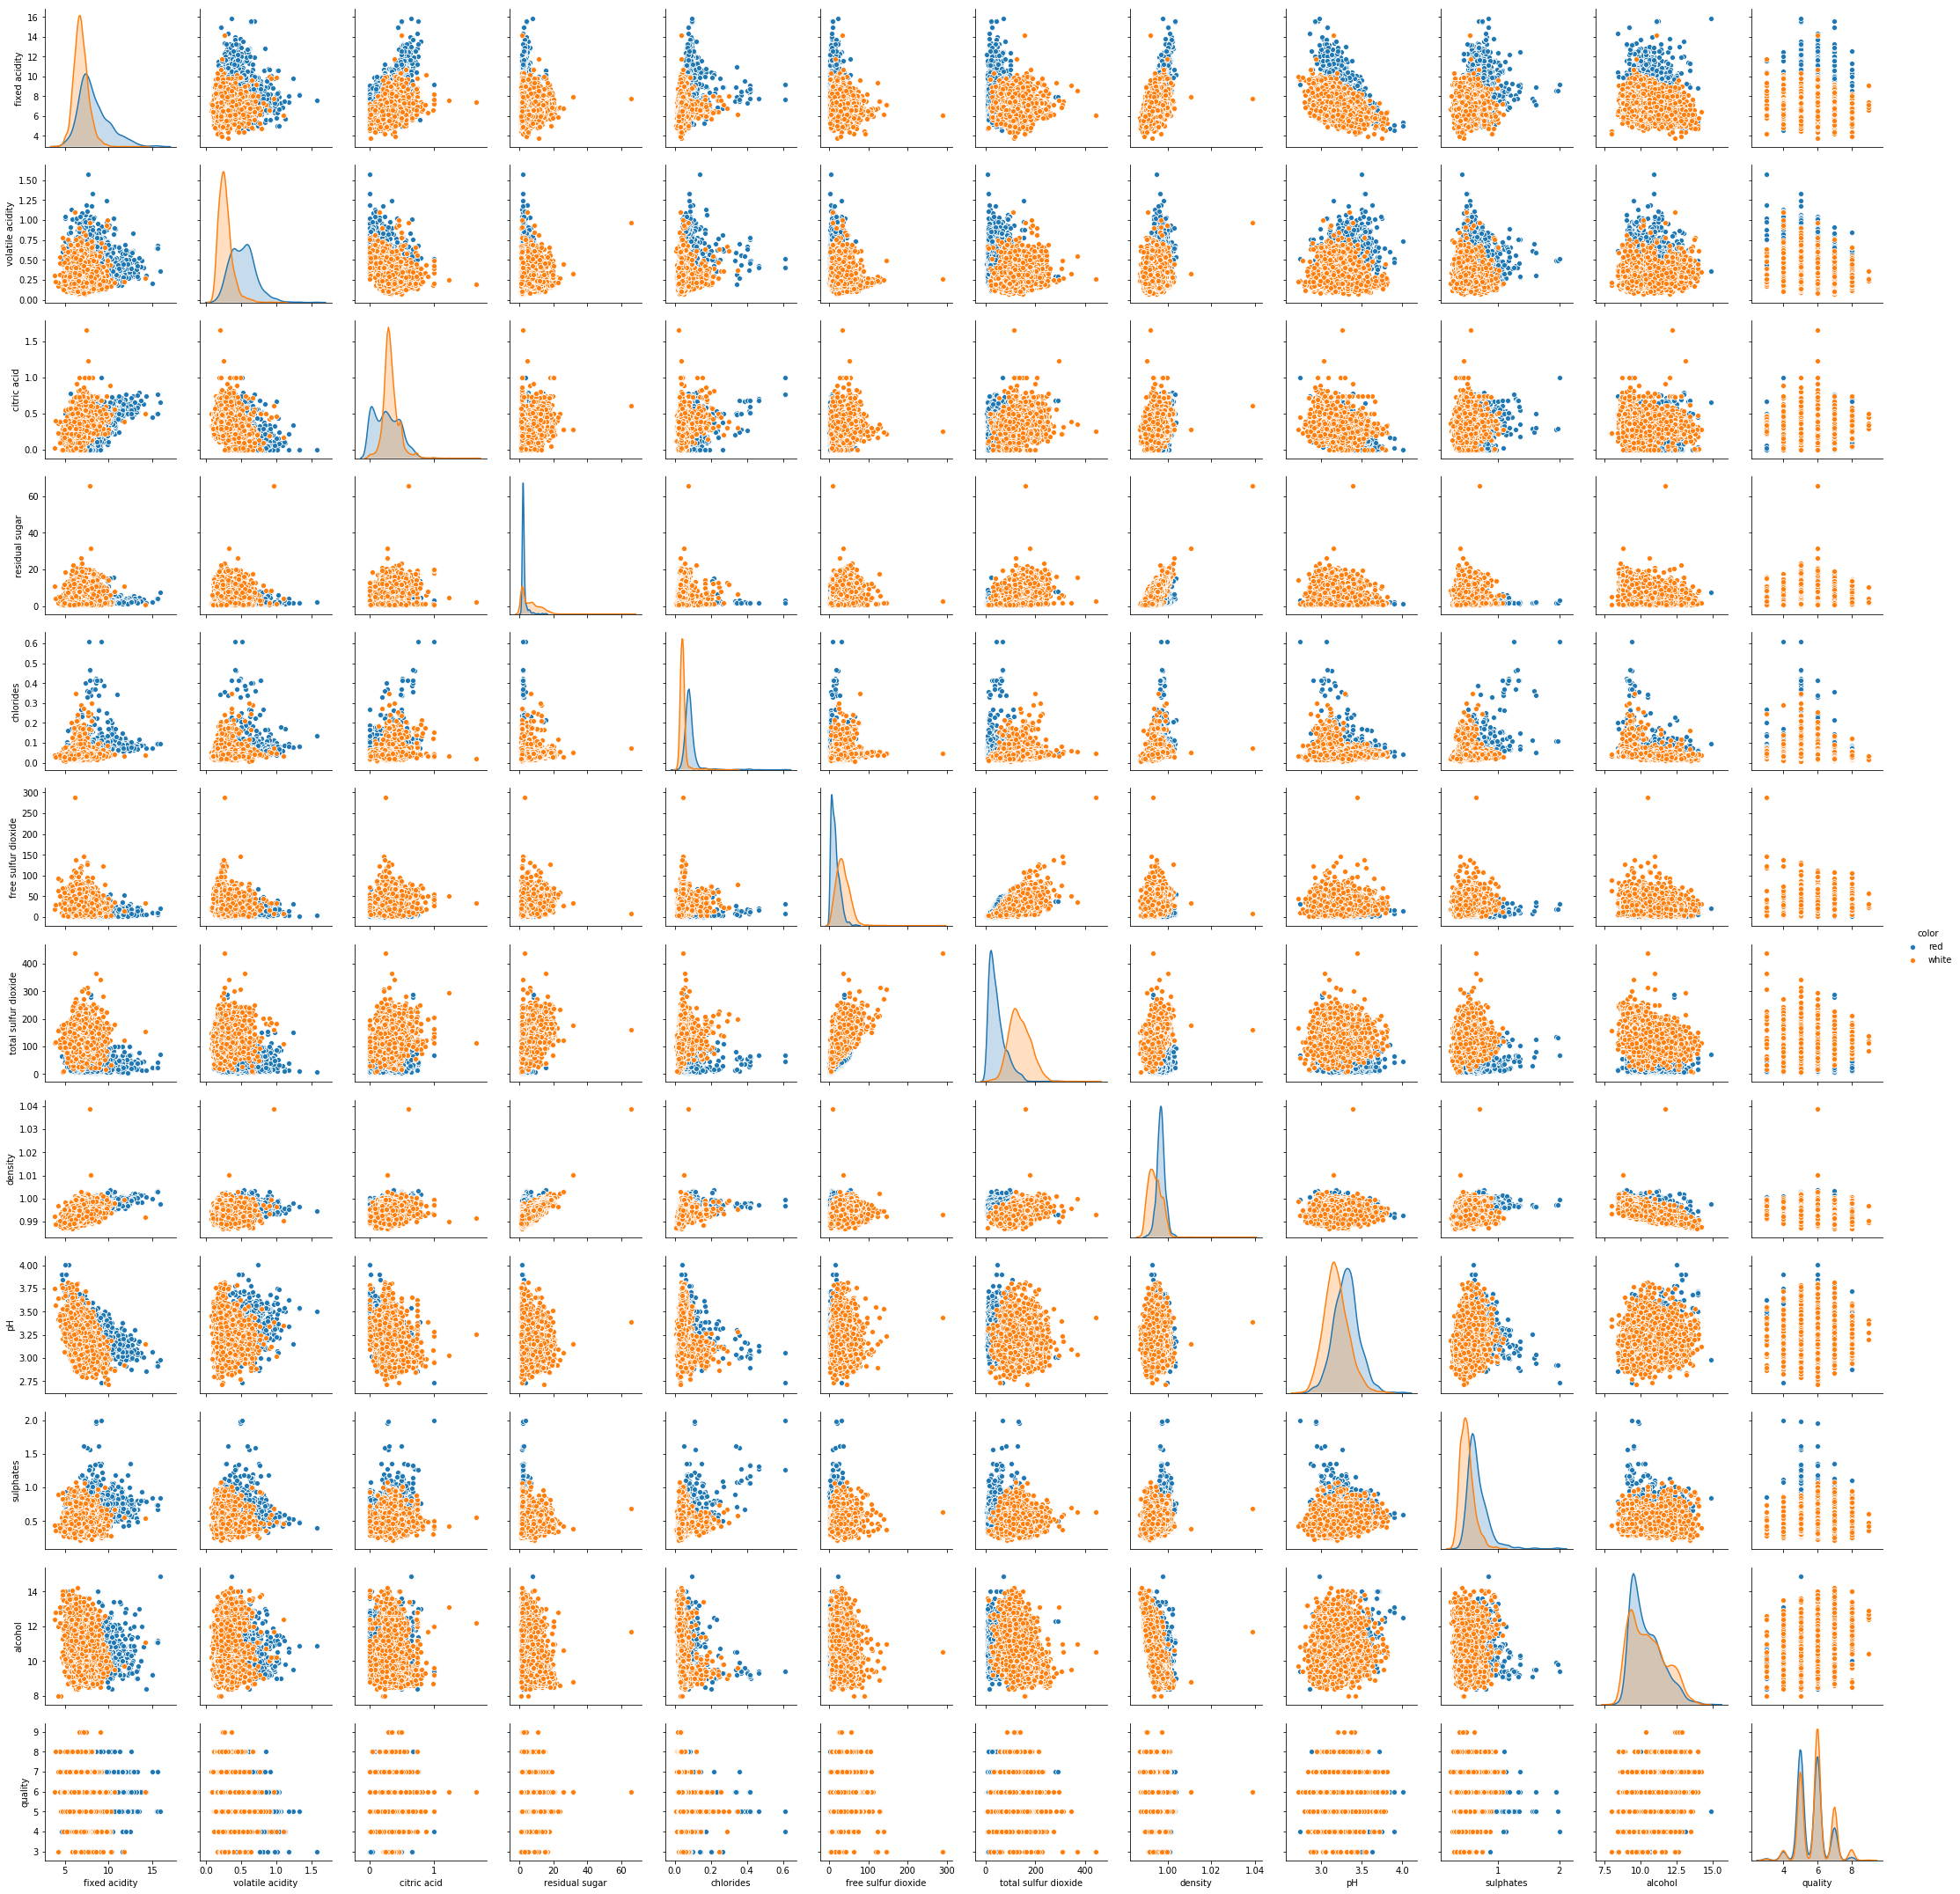

In [62]:
sns.pairplot(df, hue='color')

Посмотрим на корреляции признаков.

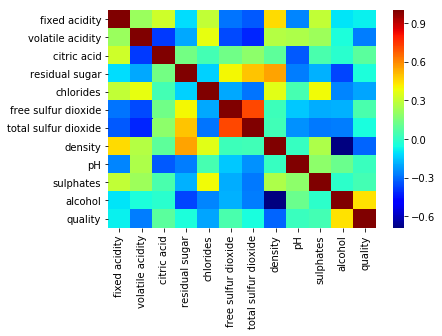

In [63]:
sns.heatmap(df.corr(), cmap=plt.cm.jet)

In [64]:
np.abs(df.corr()[df.corr() < 1.0]).max()

fixed acidity           0.458910
volatile acidity        0.414476
citric acid             0.377981
residual sugar          0.552517
chlorides               0.395593
free sulfur dioxide     0.720934
total sulfur dioxide    0.720934
density                 0.686745
pH                      0.329808
sulphates               0.395593
alcohol                 0.686745
quality                 0.444319
dtype: float64

Корреляции между признаками почти нет. Максимальное значение достигается между free sulfur dioxide и total sulfur dioxide равное 0,72. Очевидно эти признаки линейно зависимы, и при необходимости можно будет исключить один из них. Так же корреляции между целевой переменной и признаками не наблюдается. Это говорит об отсутствии явной линейной зависимости.

Посмотрим как классы разделимы после понижения пространства до 2-х с помощью PCA и TSNE.

In [65]:
map_ = {3: 'blue', 4: 'green', 5: 'red', 6:'cyan', 7: 'magenta', 8: 'yellow', 9: 'black'}

In [22]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

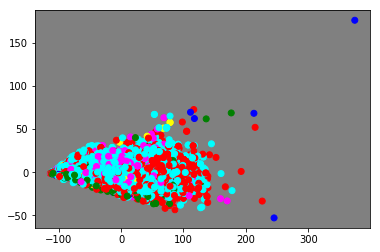

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[df.columns[df.dtypes == 'float']])
axes = plt.gca()
axes.set_facecolor('gray')
plt.scatter(X_pca[:, 0], X_pca[:, 1], color=df['quality'].map(map_))

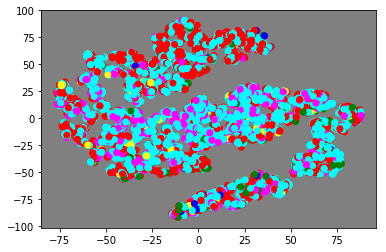

In [30]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(df[df.columns[df.dtypes == 'float']])
axes = plt.gca()
axes.set_facecolor('gray')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], color=df['quality'].map(map_))

Из этих рисунков видно, что в этих признаковых пространствах(двумерных) не разделимы. Вероятнее всего их так же трудно разделить и в исходном прострванстве. Поэтому попытаемся свести к задаче регрессии. Более того, т.к классы это некоторая шкала, то связаны между собой порядком, что так же побуждает использовать регрессию. 

Как можно было заметить выше, некоторые из признаков имеют мягко говоря "ненормальные" распределения, а так же выбросы. Это сказывается негативно для большинства алгоритмов ml. Попробуем различными преобразованиями привести их к более нормальному и почистить выбросы.

Для приведения к нормальному распределению будем брать логарифмы и квадратные корни, выясняя отпытным путём что для чего лучше подходит.

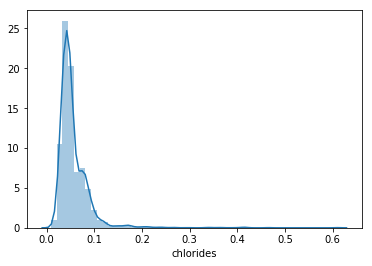

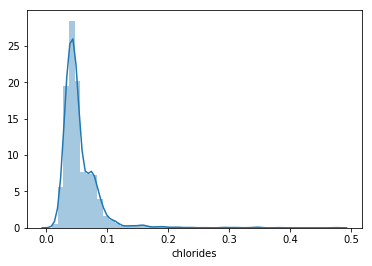

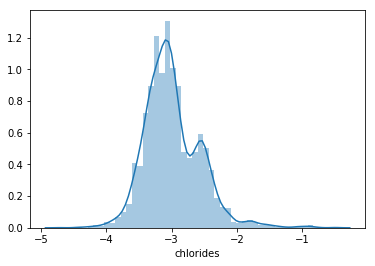

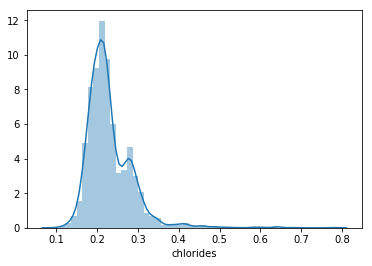

In [96]:
feat = 'chlorides'
sns.distplot(df[feat])
plt.show()
sns.distplot(np.log1p(df[feat]))
plt.show()
sns.distplot(np.log(df[feat]))
plt.show()
sns.distplot(np.sqrt(df[feat]))
plt.show()

In [97]:
# Результат
logs = ['residual sugar', 'free sulfur dioxide', 'sulphates', 'chlorides', 'fixed acidity',
        'volatile acidity']
sqrts = ['citric acid']

In [98]:
df[logs] = df[logs].apply(np.log)
df[sqrts] = df[sqrts].apply(np.sqrt)

In [99]:
# Проверяем не появилось ли пропусков просле преобразований
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
color                   False
dtype: bool

Теперь распределения выглядят более нормальными. Посмотрим как стали выглядеть boxplot-ы.

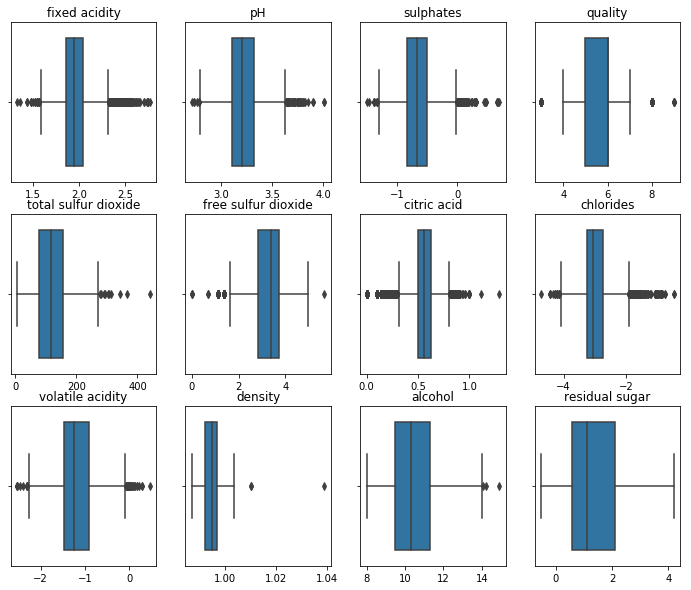

In [100]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(feature_columns, 1):
    axes = plt.subplot(3, 4, i)
    sns.boxplot(df[col], ax=axes)
    axes.set_xlabel(None)
    axes.set_title(col)

Выбросы, конечно, остались, но большинство тяжёлых хвостов исчезли. Можно продолжить вычищать выбросы, но во первых это может привести к уменьшению количества и так редковстречаемых классов, а во вторых вряд ли сильно скажется на качестве работы алгоритмов.

Не будем сохранять полученый датасет, т.к. тут всего пара преобразований, поэтому просто запомним их. Всё равно придётся делать нормализацию.